In [31]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [32]:
df = pd.read_csv(r"C:\Users\99899\Desktop\Home_Credit\updated\data\cleaned\train_filtered.csv")

In [33]:
df_filtered = df[(df['DAYS_CREDIT'] != 0) & (df['DAYS_ENDDATE_FACT'] != 0)]


In [34]:
# Convert DAYS_BIRTH from days to years and categorize
df_filtered['AGE_YEARS'] = df_filtered['DAYS_BIRTH'] / -365
df_filtered['AGE_GROUP'] = pd.cut(df_filtered['AGE_YEARS'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

# Convert DAYS_CREDIT from days to years
df_filtered['YEARS_CREDIT'] = df_filtered['DAYS_CREDIT'] / -365

# Convert DAYS_ENDDATE_FACT from days to years
df_filtered['YEARS_ENDDATE_FACT'] = df_filtered['DAYS_ENDDATE_FACT'] / -365

C:\Users\99899\AppData\Local\Temp\ipykernel_1100\306834429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AGE_YEARS'] = df_filtered['DAYS_BIRTH'] / -365
C:\Users\99899\AppData\Local\Temp\ipykernel_1100\306834429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AGE_GROUP'] = pd.cut(df_filtered['AGE_YEARS'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])
C:\Users\99899\AppData\Local\Temp\ipykernel_1100\306834429.py:6: SettingWithCopyWarni

In [35]:
#DAYS CREDIT
credit_bins = [0, 2, 5, 10, 15, 20]  # Example bins for years since credit was issued
end_date_bins = [0, 2, 5, 10, 15, 20]  # Example bins for years since last credit ended

# Labels for the bins
credit_labels = ['0-2 years', '2-5 years', '5-10 years', '10-15 years', '15-20 years']
end_date_labels = ['0-2 years', '2-5 years', '5-10 years', '10-15 years', '15-20 years']

# Categorize years into bins
df_filtered['CREDIT_AGE_YEARS'] = pd.cut(df_filtered['YEARS_CREDIT'], bins=credit_bins, labels=credit_labels)
df_filtered['END_DATE_AGE_YEARS'] = pd.cut(df_filtered['YEARS_ENDDATE_FACT'], bins=end_date_bins, labels=end_date_labels)


C:\Users\99899\AppData\Local\Temp\ipykernel_1100\4123742318.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CREDIT_AGE_YEARS'] = pd.cut(df_filtered['YEARS_CREDIT'], bins=credit_bins, labels=credit_labels)
C:\Users\99899\AppData\Local\Temp\ipykernel_1100\4123742318.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['END_DATE_AGE_YEARS'] = pd.cut(df_filtered['YEARS_ENDDATE_FACT'], bins=end_date_bins, labels=end_date_labels)


In [36]:
df['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: count, Length: 12574, dtype: int64

In [37]:
import numpy as np

# Convert DAYS_EMPLOYED to months
df_filtered['MONTHS_EMPLOYED'] = df_filtered['DAYS_EMPLOYED'] / 30.44

# Handle special values, assuming 365243 means something specific like not employed
df_filtered['MONTHS_EMPLOYED'] = np.where(df_filtered['DAYS_EMPLOYED'] == 365243, -1, df_filtered['MONTHS_EMPLOYED'])

# Convert MONTHS_EMPLOYED to integer if you need it as whole months
df_filtered['MONTHS_EMPLOYED'] = df_filtered['MONTHS_EMPLOYED'].astype(int)

C:\Users\99899\AppData\Local\Temp\ipykernel_1100\3873156475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['MONTHS_EMPLOYED'] = df_filtered['DAYS_EMPLOYED'] / 30.44
C:\Users\99899\AppData\Local\Temp\ipykernel_1100\3873156475.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['MONTHS_EMPLOYED'] = np.where(df_filtered['DAYS_EMPLOYED'] == 365243, -1, df_filtered['MONTHS_EMPLOYED'])
C:\Users\99899\AppData\Local\Temp\ipykernel_1100\3873156475.py:10: SettingWithCopyWarning: 
A value 

In [38]:
df_filtered['PAYMENT_AMT'] = pd.qcut(df_filtered['AMT_PAYMENT'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

C:\Users\99899\AppData\Local\Temp\ipykernel_1100\1331988232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PAYMENT_AMT'] = pd.qcut(df_filtered['AMT_PAYMENT'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


In [39]:
df_filtered['GOOD_PRICE'] = pd.qcut(df_filtered['AMT_GOODS_PRICE'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

C:\Users\99899\AppData\Local\Temp\ipykernel_1100\807151851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['GOOD_PRICE'] = pd.qcut(df_filtered['AMT_GOODS_PRICE'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


In [40]:
df_filtered[['ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS']]

,ORGANIZATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS
0,Business Entity Type 3,Working,Single / not married
7,Other,State servant,Married
28,Military,State servant,Single / not married
32,Business Entity Type 2,Working,Civil marriage
41,Industry: type 1,Working,Married
...,...,...,...
307490,Self-employed,Commercial associate,Married
307499,Business Entity Type 3,Working,Married
307502,Bank,Commercial associate,Single / not married
307508,Business Entity Type 1,Commercial associate,Married


# NAME_FAMILY_STATUS

In [41]:
family_analysis = df_filtered.groupby('NAME_FAMILY_STATUS')['TARGET'].mean()
print(family_analysis)

NAME_FAMILY_STATUS
Civil marriage          0.084821
Married                 0.072453
Separated               0.075012
Single / not married    0.085764
Widow                   0.054731
Name: TARGET, dtype: float64


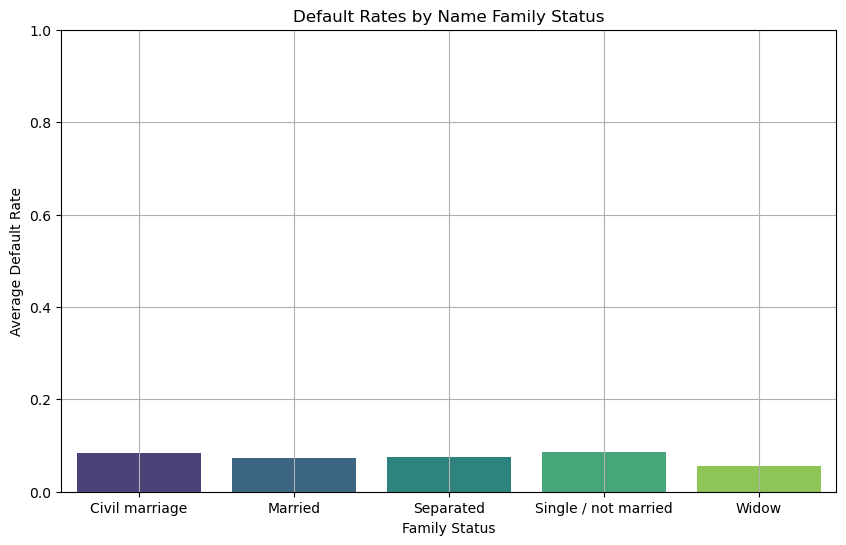

In [42]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=family_analysis.index, y=family_analysis.values, palette="viridis")
plt.title('Default Rates by Name Family Status')
plt.xlabel('Family Status')
plt.ylabel('Average Default Rate')
plt.ylim(0, 1)  # Limit y-axis to show from 0 to 1 for better comparison of percentages
plt.grid(True)
plt.show()

In [45]:
from scipy import stats
group_with_family_status = df_filtered[df_filtered['NAME_FAMILY_STATUS'] == 'Single / not married']['TARGET']
group_others = df_filtered[df_filtered['NAME_FAMILY_STATUS'] != 'Single / not married' ]['TARGET']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group_with_family_status, group_others, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("There is a statistically significant difference in default rates")
else:
    print("There is no statistically significant difference in default rates")

T-statistic: 3.9898799581683444, P-value: 6.653781160786233e-05
There is a statistically significant difference in default rates


# NAME_INCOME_TYPE

In [46]:
income_analysis = df_filtered.groupby('NAME_INCOME_TYPE')['TARGET'].mean()
print(income_analysis)

NAME_INCOME_TYPE
Commercial associate    0.071385
Pensioner               0.050775
State servant           0.060880
Student                 0.000000
Working                 0.086574
Name: TARGET, dtype: float64


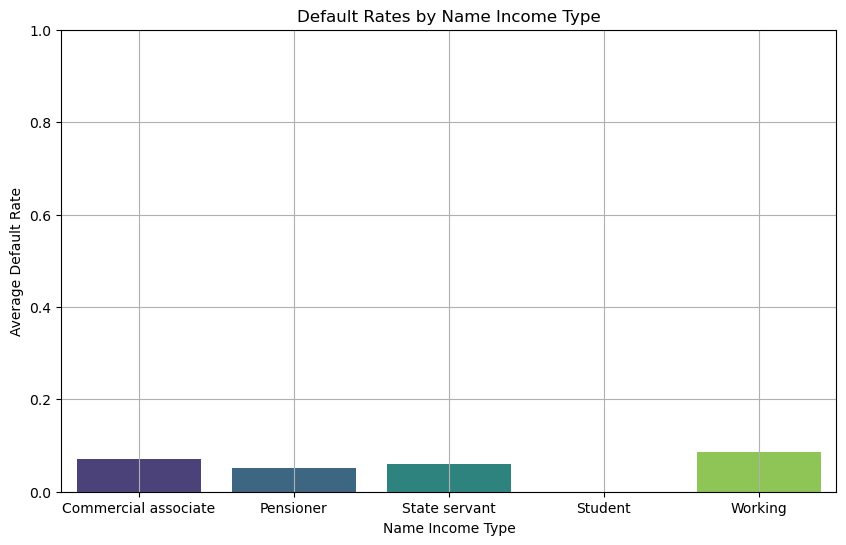

In [47]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=income_analysis.index, y=income_analysis.values, palette="viridis")
plt.title('Default Rates by Name Income Type')
plt.xlabel('Name Income Type')
plt.ylabel('Average Default Rate')
plt.ylim(0, 1)  # Limit y-axis to show from 0 to 1 for better comparison of percentages
plt.grid(True)
plt.show()

In [49]:
group_with_income_type = df_filtered[df_filtered['NAME_INCOME_TYPE'] == 'Working']['TARGET']
group_others = df_filtered[df_filtered['NAME_INCOME_TYPE'] != 'Working' ]['TARGET']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group_with_income_type, group_others, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("There is a statistically significant difference in default rates")
else:
    print("There is no statistically significant difference in default rates")

T-statistic: 11.96596003185968, P-value: 5.8080137998421915e-33
There is a statistically significant difference in default rates


# ORGANIZATION_TYPE

## no Statistical significant change

In [50]:
organization_analysis = df_filtered.groupby('ORGANIZATION_TYPE')['TARGET'].mean()
organization_analysis.head(5)


ORGANIZATION_TYPE
Advertising               0.080460
Agriculture               0.099796
Bank                      0.052174
Business Entity Type 1    0.097315
Business Entity Type 2    0.078652
Name: TARGET, dtype: float64

In [51]:
group_with_organization_type = df_filtered[df_filtered['ORGANIZATION_TYPE'] == 'Advertising']['TARGET']
group_others = df_filtered[df_filtered['ORGANIZATION_TYPE'] != 'Advertising' ]['TARGET']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group_with_organization_type, group_others, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("There is a statistically significant difference in default rates")
else:
    print("There is no statistically significant difference in default rates")

T-statistic: 0.19913480328448238, P-value: 0.8426261912343205
There is no statistically significant difference in default rates


# GOODS PRICE

In [52]:
goods_price_analysis = df_filtered.groupby('GOOD_PRICE')['TARGET'].mean()
print(goods_price_analysis)


GOOD_PRICE
Low          0.065043
Medium       0.097972
High         0.080396
Very High    0.053833
Name: TARGET, dtype: float64


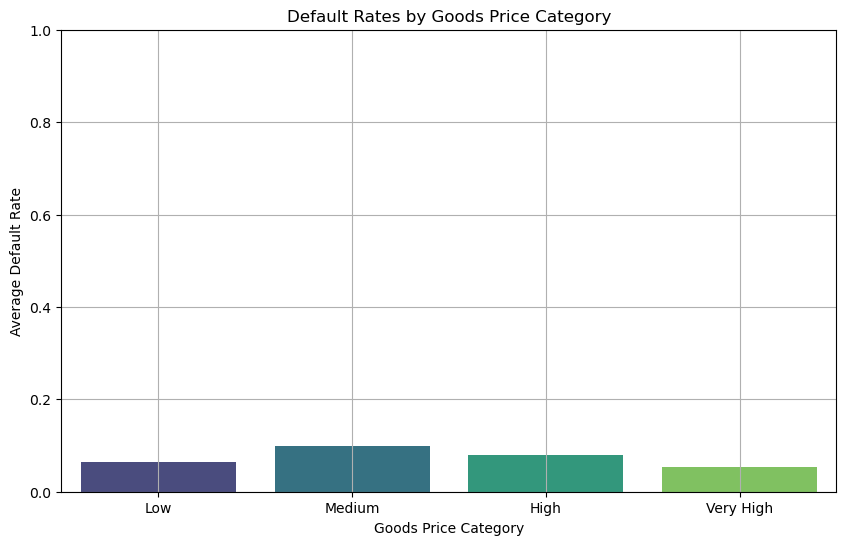

In [53]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=goods_price_analysis.index, y=goods_price_analysis.values, palette="viridis")
plt.title('Default Rates by Goods Price Category')
plt.xlabel('Goods Price Category')
plt.ylabel('Average Default Rate')
plt.ylim(0, 1)  # Limit y-axis to show from 0 to 1 for better comparison of percentages
plt.grid(True)
plt.show()


In [54]:
# Convert EMPLOYMENT_DURATION to absolute values to represent months employed
df_filtered['EMPLOYEMENT_DURATION_MONTHS'] = df_filtered['MONTHS_EMPLOYED'].abs()

C:\Users\99899\AppData\Local\Temp\ipykernel_1100\3076609517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['EMPLOYEMENT_DURATION_MONTHS'] = df_filtered['MONTHS_EMPLOYED'].abs()


C:\Users\99899\AppData\Local\Temp\ipykernel_1100\3527027097.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['EMPLOYEMENT_DURATION_GROUP'] = pd.cut(df_filtered['EMPLOYEMENT_DURATION_MONTHS'], bins=bins, labels=labels)


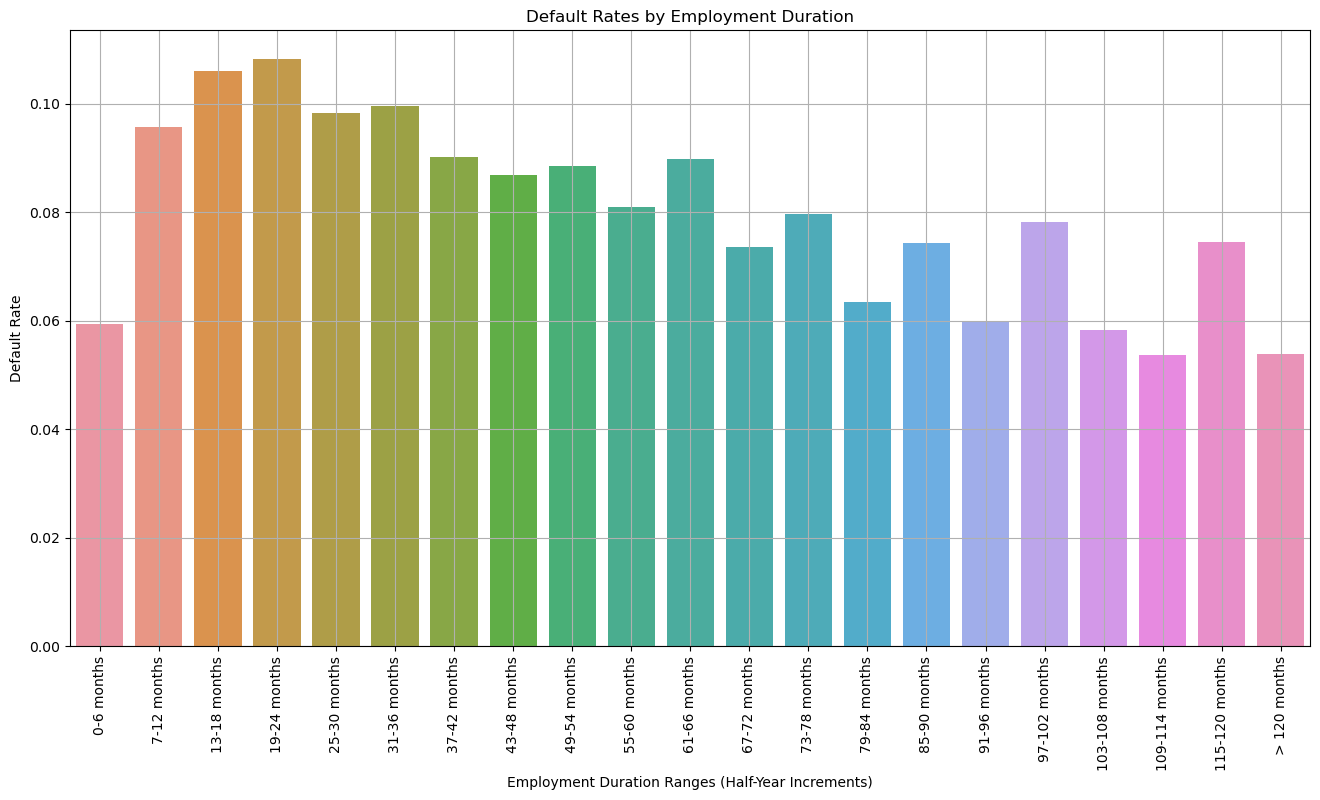

In [55]:
# Categorizing 'EMPLOYMENT_DURATION_MONTHS' into half-year ranges
bins = [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96, 102, 108, 114, 120, float('inf')]
labels = ['0-6 months', '7-12 months', '13-18 months', '19-24 months', '25-30 months',
          '31-36 months', '37-42 months', '43-48 months', '49-54 months', '55-60 months',
          '61-66 months', '67-72 months', '73-78 months', '79-84 months', '85-90 months',
          '91-96 months', '97-102 months', '103-108 months', '109-114 months', '115-120 months', '> 120 months']
df_filtered['EMPLOYEMENT_DURATION_GROUP'] = pd.cut(df_filtered['EMPLOYEMENT_DURATION_MONTHS'], bins=bins, labels=labels)

# Group by the new category and calculate the mean default rate
default_rates_by_employment_duration = df_filtered.groupby('EMPLOYEMENT_DURATION_GROUP')['TARGET'].mean().reset_index()

# Plotting
plt.figure(figsize=(16, 8))
sns.barplot(x='EMPLOYEMENT_DURATION_GROUP', y='TARGET', data=default_rates_by_employment_duration)
plt.title('Default Rates by Employment Duration')
plt.xlabel('Employment Duration Ranges (Half-Year Increments)')
plt.ylabel('Default Rate')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.grid(True)
plt.show()


# EMPLOYEMENT DURATION

In [56]:
default_rates_by_employement = df_filtered.groupby('EMPLOYEMENT_DURATION_GROUP')['TARGET'].mean()
print("Default rates by region rating:")
default_rates_by_employement.head(10)

Default rates by region rating:


EMPLOYEMENT_DURATION_GROUP
0-6 months      0.059348
7-12 months     0.095604
13-18 months    0.106102
19-24 months    0.108147
25-30 months    0.098256
31-36 months    0.099613
37-42 months    0.090101
43-48 months    0.086883
49-54 months    0.088427
55-60 months    0.081033
Name: TARGET, dtype: float64

# REGION RATING

In [58]:
# Analyze default rates by region rating
default_rates_by_region = df_filtered.groupby('REGION_RATING_CLIENT')['TARGET'].mean()
print("Default rates by region rating:")
print(default_rates_by_region)

Default rates by region rating:
REGION_RATING_CLIENT
1    0.047717
2    0.073068
3    0.099424
Name: TARGET, dtype: float64


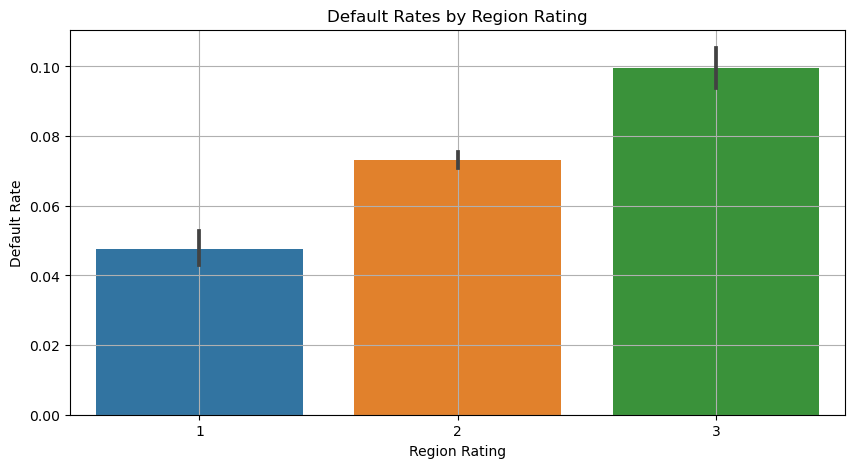

In [59]:
plt.figure(figsize=(10, 5))
sns.barplot(x='REGION_RATING_CLIENT', y='TARGET', data=df_filtered)
plt.title('Default Rates by Region Rating')
plt.xlabel('Region Rating')
plt.ylabel('Default Rate')
plt.grid(True)
plt.show()

In [60]:
group_with_region_rating_client = df_filtered[df_filtered['REGION_RATING_CLIENT'] == 3]['TARGET']
group_others = df_filtered[df_filtered['REGION_RATING_CLIENT'] != 3]['TARGET']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group_with_region_rating_client, group_others, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("There is a statistically significant difference in default rates")
else:
    print("There is no statistically significant difference in default rates")

T-statistic: 9.147692345329073, P-value: 6.699452546979426e-20
There is a statistically significant difference in default rates


In [61]:
categories = ['EMPLOYMENT_DURATION', 'END_DATE_AGE_YEARS', 'CREDIT_AGE_YEARS', 'AGE_GROUP', 'CODE_GENDER', 'CNT_CHILDREN']

# how many days passed from previous credit

In [62]:
#DAYS_ENDDATE_FACT, how many days passed from previous credit
end_date = df_filtered.groupby('END_DATE_AGE_YEARS')['TARGET'].mean()
print("Default rates by months since last enddate:")
print(end_date)

Default rates by months since last enddate:
END_DATE_AGE_YEARS
0-2 years      0.086262
2-5 years      0.067484
5-10 years          NaN
10-15 years         NaN
15-20 years         NaN
Name: TARGET, dtype: float64


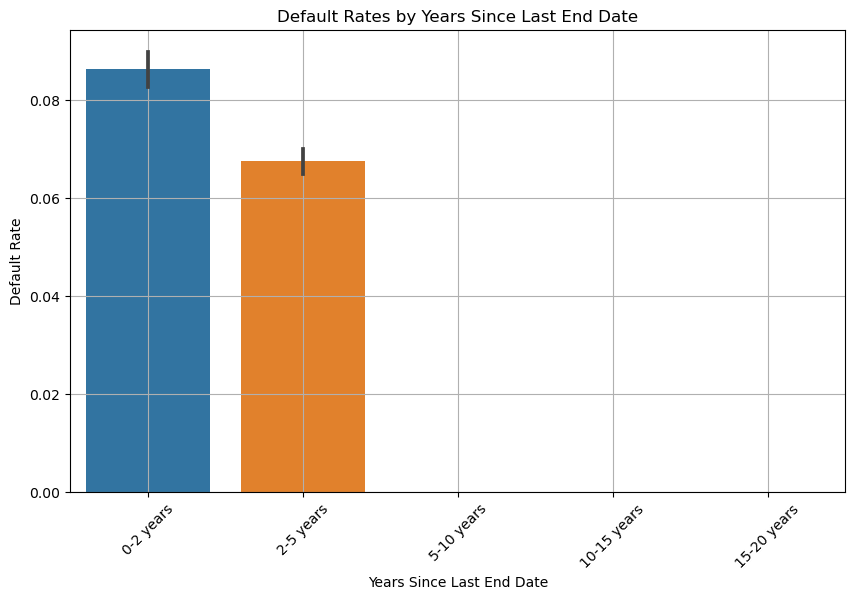

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='END_DATE_AGE_YEARS', y='TARGET', data=df_filtered)
plt.title('Default Rates by Years Since Last End Date')
plt.xlabel('Years Since Last End Date')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [64]:
import scipy.stats as stats


end_group_0_2 = df_filtered[df_filtered['END_DATE_AGE_YEARS'] == '0-2 years']['TARGET']
group_others = df_filtered[df_filtered['END_DATE_AGE_YEARS'] != '0-2 years']['TARGET']

# Perform t-test
t_stat, p_value = stats.ttest_ind(end_group_0_2, group_others, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("There is a statistically significant difference in default rates")
else:
    print("There is no statistically significant difference in default rates")

T-statistic: 8.606917885128352, P-value: 7.729722429956227e-18
There is a statistically significant difference in default rates


# when they applied for the credit

In [65]:
#DAYS_CREDIT, when they applied for the credit
credit_analysis = df_filtered.groupby('CREDIT_AGE_YEARS')['TARGET'].mean()
print("Default rates by credit age group:")
print(credit_analysis)

Default rates by credit age group:
CREDIT_AGE_YEARS
0-2 years      0.097315
2-5 years      0.069508
5-10 years     0.063397
10-15 years         NaN
15-20 years         NaN
Name: TARGET, dtype: float64


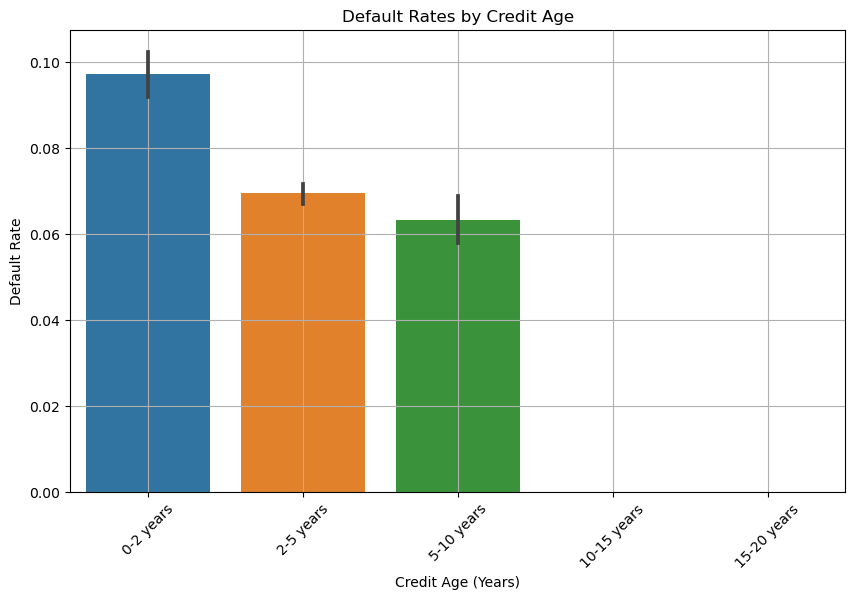

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CREDIT_AGE_YEARS', y='TARGET', data=df_filtered)
plt.title('Default Rates by Credit Age')
plt.xlabel('Credit Age (Years)')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [68]:
import scipy.stats as stats


group_credit_age_years = df_filtered[df_filtered['CREDIT_AGE_YEARS'] == '0-2 years']['TARGET']
group_others = df_filtered[df_filtered['CREDIT_AGE_YEARS'] != '0-2 years']['TARGET']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group_credit_age_years, group_others, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("There is a statistically significant difference in default rates ")
else:
    print("There is no statistically significant difference in default rates ")

T-statistic: 10.28206259252808, P-value: 9.860555786971942e-25
There is a statistically significant difference in default rates 


# DAYS_BIRTH

In [69]:
#DAYS_BIRTH
age_analysis = df_filtered.groupby('AGE_GROUP')['TARGET'].mean()
print("Default rates by age group: ")
print(age_analysis)

Default rates by age group: 
AGE_GROUP
20-30    0.102007
30-40    0.090392
40-50    0.071441
50-60    0.058063
60-70    0.044191
Name: TARGET, dtype: float64


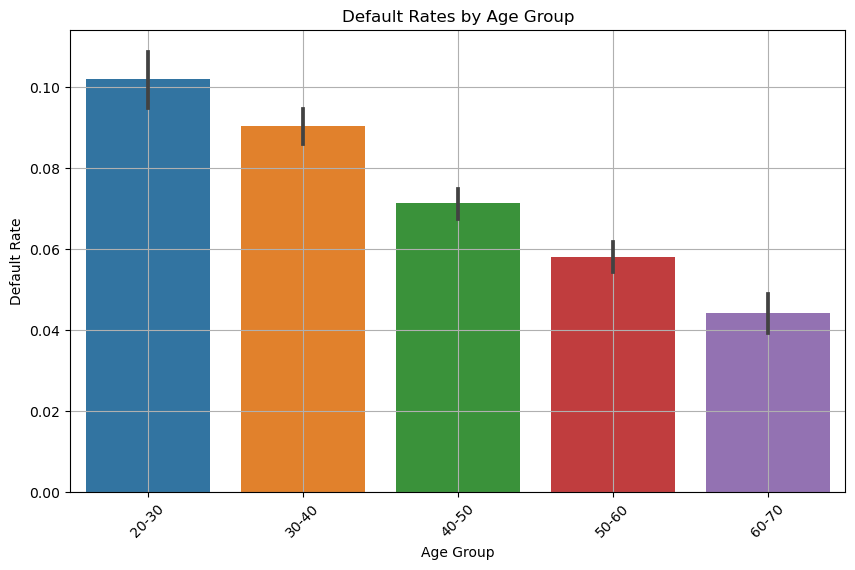

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AGE_GROUP', y='TARGET', data=df_filtered)
plt.title('Default Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [72]:
import scipy.stats as stats


group_age_group = df_filtered[df_filtered['AGE_GROUP'] == '20-30']['TARGET']
group_others = df_filtered[df_filtered['AGE_GROUP'] != '20-30']['TARGET']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group_age_group, group_others, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("There is a statistically significant difference in default rates ")
else:
    print("There is no statistically significant difference in default rates ")


T-statistic: 9.037176351268549, P-value: 1.898388138728004e-19
There is a statistically significant difference in default rates 


# GENDER

In [73]:
gender_analysis = df_filtered.groupby('CODE_GENDER')['TARGET'].mean()
print(gender_analysis)

CODE_GENDER
F    0.064690
M    0.094357
Name: TARGET, dtype: float64


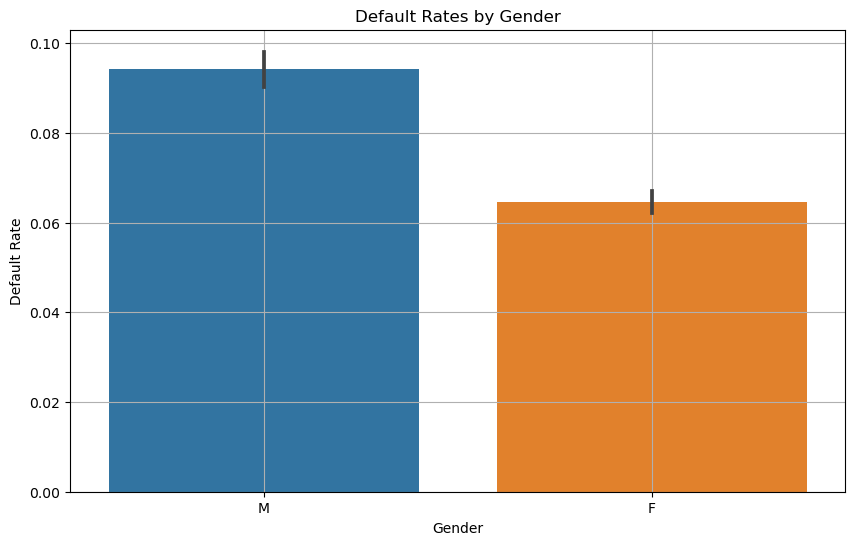

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CODE_GENDER', y='TARGET', data=df_filtered)
plt.title('Default Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Default Rate')
plt.grid(True)
plt.show()


In [75]:
group_M = df[df['CODE_GENDER'] == 'M']['TARGET']
group_others = df[df['CODE_GENDER'] != 'M']['TARGET']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group_M, group_others, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("There is a statistically significant difference in default rates ")
else:
    print("There is no statistically significant difference in default rates ")

T-statistic: 28.822384318485636, P-value: 2.867184853665532e-182
There is a statistically significant difference in default rates 


# CNT_CHILDREN

In [76]:
cnt_children_analysis = df_filtered.groupby('CNT_CHILDREN')['TARGET'].mean()
print("Default rates by CNT_CHILDREN")
print(cnt_children_analysis)

Default rates by CNT_CHILDREN
CNT_CHILDREN
0     0.070198
1     0.084758
2     0.083058
3     0.090323
4     0.154762
5     0.111111
6     1.000000
7     0.000000
9     1.000000
12    0.000000
14    0.000000
Name: TARGET, dtype: float64


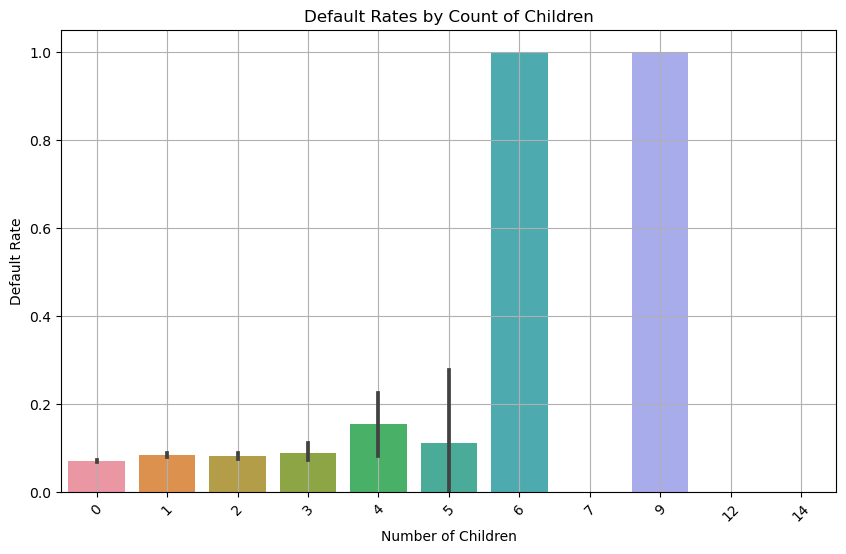

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CNT_CHILDREN', y='TARGET', data=df_filtered)
plt.title('Default Rates by Count of Children')
plt.xlabel('Number of Children')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [78]:
group_cnt_children = df_filtered[df_filtered['CNT_CHILDREN'] == 4]['TARGET']
group_others = df_filtered[df_filtered['CNT_CHILDREN'] != 4]['TARGET']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group_cnt_children, group_others, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("There is a statistically significant difference in default rates ")
else:
    print("There is no statistically significant difference in default rates ")

T-statistic: 2.020579233604997, P-value: 0.04654335028704548
There is a statistically significant difference in default rates 


# Payment_Analysis

In [79]:
payment_analysis = df_filtered.groupby('PAYMENT_AMT')['TARGET'].mean()
print(payment_analysis)

PAYMENT_AMT
Low          0.082666
Medium       0.082239
High         0.072314
Very High    0.061275
Name: TARGET, dtype: float64


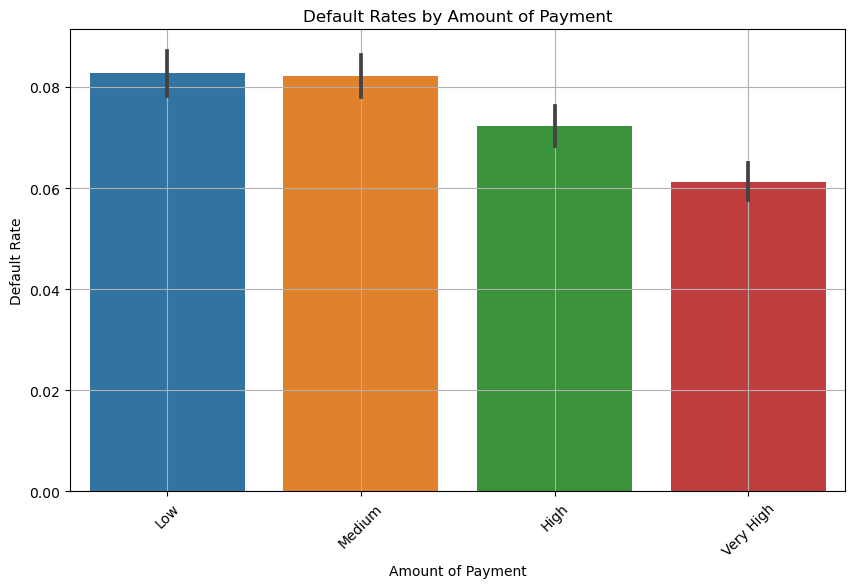

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PAYMENT_AMT', y='TARGET', data=df_filtered)
plt.title('Default Rates by Amount of Payment')
plt.xlabel('Amount of Payment')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [336]:
# age_group_risk_factor = 0.8
# df_filtered.loc[(df_filtered['AGE_YEARS'] >= 20) & (df_filtered['AGE_YEARS'] <= 30), 'AMT_CREDIT'] *= age_group_risk_factor

# # Assume a binary Loan_Status column to simulate loan approval based on employment duration
# df_filtered['Loan_Status'] = np.where(df_filtered['DAYS_EMPLOYED'] / -365 >= 5, 1, 0)

# # Adjust loan amount for medium goods price range
# goods_price_adjustment = 0.9  # 10% reduction in loan amount for medium range goods
# df_filtered['AMT_CREDIT_x'] = df_filtered.loc[df_filtered['GOOD_PRICE'] == 'Medium', 'AMT_CREDIT'] * goods_price_adjustment

# # Adjust annuity as a substitute for interest rate
# df_filtered['AMT_ANNUITY_x'] = df_filtered.loc[df_filtered['REGION_RATING_CLIENT'] == 3, 'AMT_ANNUITY'] * 1.1  # 10% increase in annuity

# # Print out the adjusted data to verify changes
# print(df_filtered[['AGE_YEARS', 'AMT_CREDIT', 'Loan_Status', 'AMT_ANNUITY']].head())


In [343]:
df_filtered

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AGE_YEARS,AGE_GROUP,YEARS_CREDIT,YEARS_ENDDATE_FACT,CREDIT_AGE_YEARS,END_DATE_AGE_YEARS,MONTHS_EMPLOYED,EMPLOYEMENT_DURATION,PAYMENT_AMT,GOOD_PRICE
0,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,...,25.920548,20-30,2.819804,2.271468,2-5 years,2-5 years,-20,6-12 month,High,Medium
7,0,Cash loans,M,Y,Y,0,1530000.0,42075.0,1530000.0,Unaccompanied,...,51.643836,50-60,7.509589,3.117808,5-10 years,2-5 years,-14,12-18 month,Very High,Very High
28,0,Cash loans,M,Y,Y,0,790830.0,57676.5,675000.0,Unaccompanied,...,27.380822,20-30,0.534247,2.457534,0-2 years,2-5 years,-59,NaN,Low,High
32,0,Cash loans,F,N,N,0,199008.0,20893.5,180000.0,Unaccompanied,...,35.545205,30-40,4.063191,3.432366,2-5 years,2-5 years,-144,NaN,Very High,Low
41,0,Cash loans,F,N,Y,0,604152.0,29196.0,540000.0,Unaccompanied,...,46.495890,40-50,0.205479,0.180822,0-2 years,0-2 years,-15,12-18 month,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307490,0,Cash loans,M,Y,Y,2,1078200.0,31522.5,900000.0,Unaccompanied,...,30.071233,30-40,5.520085,3.662231,5-10 years,2-5 years,-64,NaN,Medium,Very High
307499,0,Cash loans,F,N,Y,0,1303812.0,35982.0,1138500.0,Unaccompanied,...,55.863014,50-60,4.746966,3.201382,2-5 years,2-5 years,-174,NaN,High,Very High
307502,0,Cash loans,F,N,Y,0,345510.0,17770.5,247500.0,Unaccompanied,...,32.520548,30-40,3.326268,2.729536,2-5 years,2-5 years,-13,12-18 month,Low,Low
307508,1,Cash loans,F,N,Y,0,370107.0,20205.0,319500.0,Unaccompanied,...,32.769863,30-40,3.024658,2.353425,2-5 years,2-5 years,-157,NaN,High,Medium


In [339]:
df_filtered[['TARGET','AGE_GROUP', 'CREDIT_AGE_YEARS', 'END_DATE_AGE_YEARS', 'GOOD_PRICE', 'EMPLOYEMENT_DURATION', 'CNT_CHILDREN', 'CODE_GENDER', 'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_PAYMENT']]

,TARGET,AGE_GROUP,CREDIT_AGE_YEARS,END_DATE_AGE_YEARS,GOOD_PRICE,EMPLOYEMENT_DURATION,CNT_CHILDREN,CODE_GENDER,REGION_RATING_CLIENT,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,AMT_CREDIT,AMT_ANNUITY,CNT_PAYMENT
0,1,20-30,2-5 years,2-5 years,Medium,6-12 month,0,M,2,Working,Single / not married,Business Entity Type 3,Cash loans,N,406597.5,24700.5,0.0
7,0,50-60,5-10 years,2-5 years,Very High,12-18 month,0,M,3,State servant,Married,Other,Cash loans,Y,1530000.0,42075.0,0.0
28,0,20-30,0-2 years,2-5 years,High,NaN,0,M,1,State servant,Single / not married,Military,Cash loans,Y,790830.0,57676.5,0.0
32,0,30-40,2-5 years,2-5 years,Low,NaN,0,F,2,Working,Civil marriage,Business Entity Type 2,Cash loans,N,199008.0,20893.5,12.0
41,0,40-50,0-2 years,0-2 years,High,12-18 month,0,F,2,Working,Married,Industry: type 1,Cash loans,N,604152.0,29196.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307490,0,30-40,5-10 years,2-5 years,Very High,NaN,2,M,2,Commercial associate,Married,Self-employed,Cash loans,Y,1078200.0,31522.5,0.0
307499,0,50-60,2-5 years,2-5 years,Very High,NaN,0,F,2,Working,Married,Business Entity Type 3,Cash loans,N,1303812.0,35982.0,12.0
307502,0,30-40,2-5 years,2-5 years,Low,12-18 month,0,F,2,Commercial associate,Single / not married,Bank,Cash loans,N,345510.0,17770.5,0.0
307508,1,30-40,2-5 years,2-5 years,Medium,NaN,0,F,2,Commercial associate,Married,Business Entity Type 1,Cash loans,N,370107.0,20205.0,0.0


In [192]:
from scipy.stats import ttest_ind

# Adjust credit limit for age group 20-30
df_filtered.loc[df_filtered['AGE_GROUP'] == '20-30', 'AMT_CREDIT'] *= 0.8

# Compare default rates
default_rate_control = df_filtered[df_filtered['AGE_GROUP'] != '20-30']['TARGET'].mean()
default_rate_treatment = df_filtered[df_filtered['AGE_GROUP'] == '20-30']['TARGET'].mean()

# Perform a t-test
t_stat, p_val = ttest_ind(df_filtered[df_filtered['AGE_GROUP'] == '20-30']['TARGET'], df_filtered[df_filtered['AGE_GROUP'] != '20-30']['TARGET'], equal_var=False)

print(f"Control Default Rate (Non 20-30): {default_rate_control:.2f}")
print(f"Treatment Default Rate (20-30): {default_rate_treatment:.2f}")
print(f"T-statistic: {t_stat}, P-value: {p_val}")



Control Default Rate (Non 20-30): 0.07
Treatment Default Rate (20-30): 0.10
T-statistic: 9.037176351268549, P-value: 1.898388138728004e-19


In [166]:
# # Define custom bins and labels for the seller place area
# bins = [-1, 200, 400, 600, 800]  # Adjust these based on what makes sense for your dataset
# labels = ['Low', 'Medium', 'High', 'Very High']
# df['AREA_GROUP'] = pd.cut(df['SELLERPLACE_AREA'], bins=bins, labels=labels, right=False)

# # Calculate default rates by seller place area
# #SELLERPLACE_AREA qanchalik uyda turishibdi
# area_analysis = df.groupby('AREA_GROUP')['TARGET'].mean()
# print("Default rates by seller place area:")
# print(area_analysis)


In [ ]:
# #DAYS_DECISION
# # Calculate quantiles for more data-driven bins or define them manually
# bin_edges = np.linspace(df['MONTHS_DECISION'].min(), df['MONTHS_DECISION'].max(), num=6)
# # Create labels based on these edges
# bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])} months" for i in range(len(bin_edges)-1)]

# # Use these edges and labels in pd.cut
# df['MONTHS_DECISION_BINS'] = pd.cut(df['MONTHS_DECISION'], bins=bin_edges, labels=bin_labels)

Key findings

After carrying out Exploratory Data Analysis, we were able to see that our dataset is highly imbalanced (there are far more Class 0 values as compared to Class 1 values in Target column), which means that we have to take this imbalance into account while conducting hypothesis testing and summarizing the results. 




- Most number of people applying for loans are in the range of (35–40) years whereas this is followed by people in the range of (40–45) years whereas the number of applicants in people aged <25 or aged>65 is very low. Again, for the people who are deemed capable of loan repayment, people in the same age buckets of (35–40) years and (40–45) years are deemed to be most capable. People aged in the buckets (25–30) years and (30–35) years have a large chance of being deemed not capable for loan repayment.

- There is a statistically significant difference in default rates for family status feature

- Clients with 0–6 months and more than 90 months of employment duration show a low default risk rate, 0.8. While those with between 7 and 80 months of employment duration show a higher than 0.6 default risk rate. 

- There is a statistically significant difference in default rates for name_income_type feature

- There is no statistically significant difference in default rates for organization type feature

- There is a statistically significant difference in default rates for region rates feature
     The regions with a rate of 3 show a higher default rate which is 10% rather than the regions with a rate of 1 and 2 with a 7% default rate. 

- There is a statistically significant difference in default rates in how many days passed from previous credit
     Clients who applied within 2 years for the credit from the previous one, show a high rate of default risk rate of more than 8%, and those within 2–5 years show more than 6%. 
     

- There is a statistically significant difference in default rates in credit age

- There is a statistically significant difference in default rates in age group
     The 20-30 age group of clients shows a high rate of default risk at 10%, while the 30-40 age group is more than 8%. 

- There is a statistically significant difference in default rates in gender
     In terms of gender, males show high rate of default more than 9% compared to females with the more than 6%

- There is a statistically significant difference in default rates in number of children



# Potential Solutions

1.	Risk-based pricing: Implement a risk-based pricing strategy, where the interest rates and terms of the loan are customized to the borrower's credit risk. Higher-risk borrowers can be charged higher interest rates to offset the increased likelihood of defaults. This helps align the loan terms with the borrower's risk profile.

2.	Changes in Financial Circumstances: Stay informed about any changes in borrowers' financial circumstances, such as job loss, reduction in income, or significant life events. These changes can impact their ability to make timely payments. Encouraging borrowers to update their financial information regularly can help identify potential payment issues.